In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

## Reading Data

In [4]:
# Define the transformation for the dataset (normalization is optional but common)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize to (-1, 1) range
])

train_dataset = datasets.FashionMNIST(root='./data',train=True,transform=transform,download=True)
test_dataset = datasets.FashionMNIST(root='./data',train=False,transform=transform,download=True)

# Create data loaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True,drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.data.shape[0])

100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [5]:
# Test loading one batch of data
X, y = next(iter(train_loader))
print(f"Feature batch shape: {X.shape}")
print(f"Label batch shape: {y.shape}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Label batch shape: torch.Size([64])


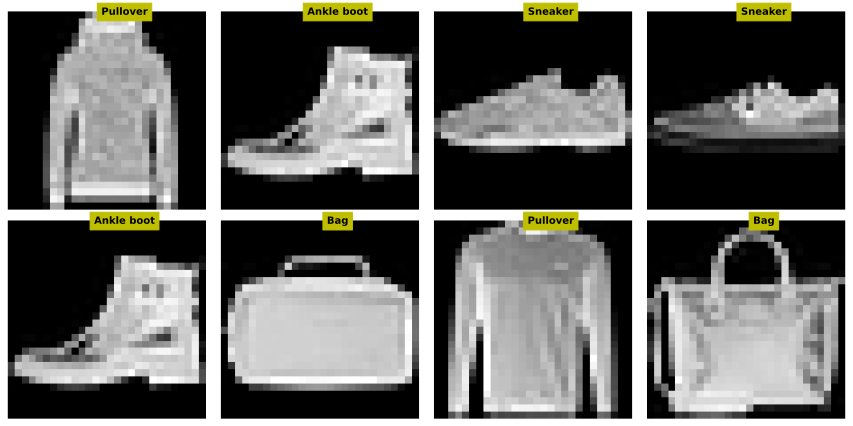

In [9]:
fig,axs = plt.subplots(2,4,figsize=(12,6))

X,y = next(iter(train_loader))

for ax in axs.flatten():
    
    randIdx = np.random.randint(0,len(X))
    pic = X.data[randIdx].numpy().reshape(28,28)
    pic = pic / 2 + 0.5
    ax.imshow(pic,cmap='gray')
    
    label = train_dataset.classes[y[randIdx]]

    ax.text(16, 0,label, ha='center', fontweight='bold', color='k', backgroundcolor='y')
    ax.axis('off')
    
plt.tight_layout()
plt.show()